In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [2]:
feature_train = pd.read_csv("feature_train.csv")
feature_test = pd.read_csv("feature_test.csv")

In [3]:
X_train_7 = feature_train[['unique_session','sessions_duration', 'value_purchase', 'pct_city','0']]
y_train_7 = feature_train['user_purchase_binary_7_days']

X_train_14 = feature_train[['unique_session','sessions_duration', 'value_purchase', 'pct_city','0']]
y_train_14 = feature_train['user_purchase_binary_14_days']

## Random Forest

In [98]:
# train test split
X_train, X_val, y_train, y_val = train_test_split(X_train_7, y_train_7, test_size=0.2)

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf_7 = RandomForestClassifier(n_estimators=500, max_depth=20,criterion='entropy',oob_score=True)

In [100]:
rf_7.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [101]:
y_hat = rf_7.predict_proba(X_val)
y_pred = pd.DataFrame(y_hat)[1]
roc_auc_score(y_val,y_pred)

0.9602652353969238

In [103]:
X_train, X_val, y_train, y_val = train_test_split(X_train_14, y_train_14, test_size=0.2)
rf_14 = RandomForestClassifier(n_estimators=500, max_depth=20,criterion='entropy',oob_score=True)
rf_14.fit(X_train,y_train)
y_hat = rf_14.predict_proba(X_val)
y_pred = pd.DataFrame(y_hat)[1]
roc_auc_score(y_val,y_pred)

0.9573440863992689

## Gradient Boosting

In [105]:
def feature_imp(model):
    feat_imp = pd.Series(model.get_booster().get_score(importance_type='weight')).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title = 'Feature Importance')
    plt.ylabel('Feature Importance Score')

In [145]:
X_train_7 = feature_train[['unique_session','purchase_before', 'value_purchase','sessions_duration','pct_country','pct_city','0','66']]
y_train_7 = feature_train['user_purchase_binary_7_days']

X_train_14 = feature_train[['unique_session','purchase_before', 'value_purchase','sessions_duration','pct_country','0','66']]
y_train_14 = feature_train['user_purchase_binary_14_days']

In [179]:
X_train, X_val, y_train, y_val = train_test_split(X_train_7, y_train_7, test_size=0.2)
model_7 = xgb.XGBClassifier(n_estimators=400,max_depth=20)
model_7.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=20, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

0.9603390677070966


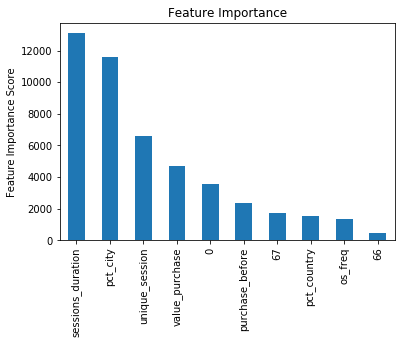

In [180]:
y_hat = model_7.predict_proba(X_val)
y_pred = pd.DataFrame(y_hat)[1]
print(roc_auc_score(y_val,y_pred))
feature_imp(model_7)

In [185]:
X_train, X_val, y_train, y_val = train_test_split(X_train_14, y_train_14, test_size=0.2)
model_14 = xgb.XGBClassifier(n_estimators=400,max_depth=20)
model_14.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=20, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

0.9616371145906939


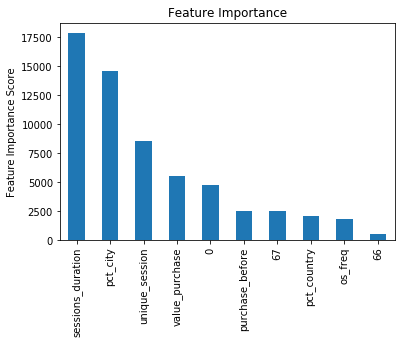

In [186]:
y_hat = model_14.predict_proba(X_val)
y_pred = pd.DataFrame(y_hat)[1]
print(roc_auc_score(y_val,y_pred))
feature_imp(model_14)

## Under sampling

In [25]:
df_train, df_val = train_test_split(feature_train, test_size=0.2)
no_purchase = len(df_train[df_train['user_purchase_binary_7_days'] == 1])
non_purchase_indices = df_train[df_train['user_purchase_binary_7_days'] == 0].index
random_indices = np.random.choice(non_purchase_indices, no_purchase, replace=False)
purchase_indices = df_train[df_train['user_purchase_binary_7_days'] == 1].index
under_sample_indices = np.concatenate([purchase_indices,random_indices])
under_sample = df_train.loc[under_sample_indices]

In [26]:
X_train_7 = under_sample[['unique_session','purchase_before', 'value_purchase','sessions_duration','pct_country','pct_city','0','66']]
y_train_7 = under_sample['user_purchase_binary_7_days']
X_val_7 = df_val[['unique_session','purchase_before', 'value_purchase','sessions_duration','pct_country','pct_city','0','66']]
y_val_7 = df_val['user_purchase_binary_7_days']

In [27]:
model_7_under = xgb.XGBClassifier(n_estimators=1000,max_depth=50, learning_rate=0.01)
model_7_under.fit(X_train_7,y_train_7)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=50, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [28]:
y_hat = model_7_under.predict_proba(X_val_7)
y_pred = pd.DataFrame(y_hat)[1]
roc_auc_score(y_val_7,y_pred)

0.9847980823482678

In [29]:
df_train, df_val = train_test_split(feature_train, test_size=0.2)
no_purchase = len(df_train[df_train['user_purchase_binary_14_days'] == 1])
non_purchase_indices = df_train[df_train['user_purchase_binary_14_days'] == 0].index
random_indices = np.random.choice(non_purchase_indices, no_purchase, replace=False)
purchase_indices = df_train[df_train['user_purchase_binary_14_days'] == 1].index
under_sample_indices = np.concatenate([purchase_indices,random_indices])
under_sample = df_train.loc[under_sample_indices]

In [30]:
X_train_14 = under_sample[['unique_session','purchase_before', 'value_purchase','sessions_duration','pct_country','pct_city','0','66']]
y_train_14 = under_sample['user_purchase_binary_14_days']
X_val_14 = df_val[['unique_session','purchase_before', 'value_purchase','sessions_duration','pct_country','pct_city','0','66']]
y_val_14 = df_val['user_purchase_binary_14_days']

In [32]:
model_14_under = xgb.XGBClassifier(n_estimators=1000,max_depth=50, learning_rate=0.01)
model_14_under.fit(X_train_14,y_train_14)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=50, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [33]:
y_hat = model_14_under.predict_proba(X_val_14)
y_pred = pd.DataFrame(y_hat)[1]
roc_auc_score(y_val_14,y_pred)

0.9838669445099735

# Hyperparameter Tuning

In [93]:
import matplotlib.pylab as plt

In [7]:
X_train_7, X_val_7, y_train_7, y_val_7 = train_test_split(X_train_7, y_train_7, test_size=0.2)
X_train_14, X_val_14, y_train_14, y_val_14 = train_test_split(X_train_14, y_train_14, test_size=0.2)

In [163]:
X_val_7.head()

,unique_session,purchase_before,value_purchase,sessions_duration,os_freq,pct_country,pct_city,0,66,67
40023,4.0,0.0,0.0,0.001861,0.676836,0.001404,0.00000,4.0,1.0,0.0
73159,32.0,0.0,0.0,0.039422,0.311655,0.004113,0.00954,43.0,1.0,29.0
30421,2.0,0.0,0.0,0.000909,0.676836,0.004113,0.00954,2.0,0.0,0.0
167482,1.0,0.0,0.0,0.000000,0.311655,0.004113,0.00000,0.0,0.0,0.0
160864,2.0,0.0,0.0,0.000626,0.311655,0.001138,0.00000,0.0,0.0,0.0


In [129]:
def feature_imp(model):
    feat_imp = pd.Series(model.get_booster().get_score(importance_type='weight')).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title = 'Feature Importance')
    plt.ylabel('Feature Importance Score')
    
def xgbfit(model):  
    model.fit(X_train_7, y_train_7, eval_metric='auc')
    y_hat_7 = model.predict_proba(X_val_7)
    y_pred_7 = pd.DataFrame(y_hat_7)[1]
    auc_7 = roc_auc_score(y_val_7, y_pred_7)
    print(f"Val AUC for 7 days: {auc_7}")
    
    model.fit(X_train_14, y_train_14, eval_metric='auc')
    y_hat_14 = model.predict_proba(X_val_14)
    y_pred_14 = pd.DataFrame(y_hat_14)[1]
    auc_14 = roc_auc_score(y_val_14, y_pred_14)
    print(f"Val AUC for 14 days: {auc_14}")

In [130]:
# Setting initial values:

xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=400,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=42)

xgbfit(xgb1)

Val AUC for 7 days: 0.9763009042073586
Val AUC for 14 days: 0.9743702115220907


In [136]:
# Tuning max_depth and child_weight
from sklearn.model_selection import GridSearchCV 

param_test_1 = {
 'max_depth': [2,3,5,10,15],
 'min_child_weight':range(1,6,2)
}

gsearch_1 = GridSearchCV(estimator = xgb1, 
                         param_grid = param_test_1, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch_1.fit(X_train_7, y_train_7)
gsearch_1.best_params_, gsearch_1.best_score_

# after done, repeat same but with one below and one above optimum value

({'max_depth': 3, 'min_child_weight': 3}, 0.9742951132251753)

In [139]:
%%time
param_test_2 = {
 'max_depth':[3,4],
 'min_child_weight':[2,3,4]
}
gsearch = GridSearchCV(estimator = xgb1, 
                         param_grid = param_test_2, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch.fit(X_train_7, y_train_7)
print(gsearch.best_params_, gsearch.best_score_)


{'max_depth': 3, 'min_child_weight': 3} 0.9742951132251753
CPU times: user 34.8 s, sys: 276 ms, total: 35.1 s
Wall time: 5min 8s


In [141]:
%%time
# tunining gamma:
param_test_3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch = GridSearchCV(estimator = xgb1, 
                         param_grid = param_test_3, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch.fit(X_train_7, y_train_7)
print(gsearch.best_params_, gsearch.best_score_)

{'gamma': 0.4} 0.970972672817286
CPU times: user 51.3 s, sys: 300 ms, total: 51.6 s
Wall time: 6min 31s


In [143]:
# recalibrate the parameters:
xgb2 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=400,
 max_depth=3,
 min_child_weight=3,
 gamma=0.4,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=42)

xgbfit(xgb2)

Val AUC for 7 days: 0.9759860827536663
Val AUC for 14 days: 0.976997820220468


In [150]:
# tune subsample and colsample_bytree
param_test_4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch = GridSearchCV(estimator = xgb2, 
                         param_grid = param_test_4, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch.fit(X_train_7, y_train_7)
print(gsearch.best_params_, gsearch.best_score_)

{'colsample_bytree': 0.6, 'subsample': 0.7} 0.9744178754968438


In [152]:
%%time
#trying values in around 0.7
param_test_5 = {
 'subsample':[i/100.0 for i in range(65,80,5)],
 'colsample_bytree':[i/100.0 for i in range(55,70,5)]
}

gsearch = GridSearchCV(estimator = xgb2, 
                         param_grid = param_test_5, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch.fit(X_train_7, y_train_7)
print(gsearch.best_params_, gsearch.best_score_)

{'colsample_bytree': 0.55, 'subsample': 0.7} 0.9744178754968438
CPU times: user 31.5 s, sys: 189 ms, total: 31.6 s
Wall time: 6min 17s


In [151]:
# Tuning n_estimators (num trees)
param_test_6 = {
 'n_estimator':[300, 400, 500, 700, 900]
}

gsearch = GridSearchCV(estimator = xgb2, 
                         param_grid = param_test_6, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch.fit(X_train_7, y_train_7)
print(gsearch.best_params_, gsearch.best_score_)
#this gives us the best as the lowest, if i drill down until 5 it
# still says its the best param, but recalibrating I see the decrease
# in AUC, overfit

{'n_estimator': 300} 0.9741511918927422


In [165]:
# recalibrating
xgb3 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=400,
 max_depth=3,
 min_child_weight=3,
 gamma=0.4,
 subsample=0.7,
 colsample_bytree=0.55,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=42)

xgbfit(xgb3)

Val AUC for 7 days: 0.9743178551131615
Val AUC for 14 days: 0.9745191834544643


In [167]:
# tuning regulatizatiomn
param_test_7 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch = GridSearchCV(estimator = xgb3, 
                         param_grid = param_test_7, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch.fit(X_train_7, y_train_7)
print(gsearch.best_params_, gsearch.best_score_)

{'reg_alpha': 1e-05} 0.9743770860291686


In [169]:
# lower learning rare
param_test_8 = {
 'learning_rate':[0.001, 0.01, 0.1]
}
gsearch = GridSearchCV(estimator = xgb3, 
                         param_grid = param_test_8, scoring='roc_auc', n_jobs=4, iid=False, cv=5)

gsearch.fit(X_train_7, y_train_7)
print(gsearch.best_params_, gsearch.best_score_)

{'learning_rate': 0.1} 0.9743770860291686


In [53]:
# Final tuned 
xgb4 = xgb.XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=19,
 min_child_weight=3,
 gamma=0.1,
 subsample=1,
 colsample_bytree=1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1)

In [ ]:
(n_estimators=1000,max_depth=50, learning_rate=0.01)

## Predictiction of tuned XGB

In [47]:
res = pd.read_csv("sample_submission_2.csv")

In [48]:
np.ceil(np.log2(res.shape[0]))

19.0

In [54]:
xgb4.fit(X_train_7, y_train_7, eval_metric='auc')
y_hat_7 = xgb4.predict_proba(X_val_7)
y_pred_7 = pd.DataFrame(y_hat_7)[1]
auc_7 = roc_auc_score(y_val_7, y_pred_7)
print(f"Val AUC for 7 days: {auc_7}")
#feature_imp(xgb4)

Val AUC for 7 days: 0.9697631440646919


In [ ]:
xgb4.fit(X_train_14, y_train_14, eval_metric='auc')
y_hat_14 = xgb4.predict_proba(X_val_14)
y_pred_14 = pd.DataFrame(y_hat_14)[1]
auc_14 = roc_auc_score(y_val_14, y_pred_14)
print(f"Val AUC for 14 days: {auc_14}")
#feature_imp(xgb4)

In [ ]:
res['user_purchase_binary_7_days'] = y_pred_7
res['user_purchase_binary_14_days'] = y_pred_14
res = res.fillna(0) # new users

In [ ]:
res.to_csv('result.csv',index=False)

## NN

In [192]:
# Predict purchase in 7 days
X_train, X_val, y_train, y_val = train_test_split(X_train_7, y_train_7, test_size=0.2)

In [193]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [194]:
# Normalize
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.fit(X_val)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [198]:
import torch
from torch import nn
from torch.autograd import Variable
feature_train_v = Variable(torch.FloatTensor(X_train), requires_grad = False)
labels_train_v = Variable(torch.FloatTensor(y_train), requires_grad = False)
feature_test_v = Variable(torch.FloatTensor(X_val), requires_grad = False)
labels_test_v = Variable(torch.FloatTensor(y_val), requires_grad = False)

In [202]:
# try a simple NN with 2 layers
class LinearClassifier(nn.Module):
    def __init__(self,M=200):
        super(LinearClassifier, self).__init__()
        self.h_layer_1 = nn.Linear(10, M)
        self.h_layer_2 = nn.Linear(M, 1)
        self.s_layer_1 = nn.ReLU()
        self.s_layer_2 = nn.Sigmoid()
        
    def forward(self,x):
        y = self.h_layer_1(x)
        y = self.s_layer_1(y)
        y = self.h_layer_2(y)
        p = self.s_layer_2(y)
        return p

In [203]:
model = LinearClassifier() #declaring the classifier to an object
loss_fn = nn.BCELoss() #calculates the loss
optim = torch.optim.SGD(model.parameters(), lr = 0.01)

In [204]:
all_losses = []
for num in range(5000):
    pred = model(feature_train_v) 
    loss = loss_fn(pred, labels_train_v) 
    all_losses.append(loss.data)
    optim.zero_grad() 
    loss.backward() 
    optim.step() 

/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1594: UserWarning: Using a target size (torch.Size([154491])) that is different to the input size (torch.Size([154491, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


In [205]:
all_losses[-1]

tensor(0.0294)

In [206]:
# get predict values
predicted_values = []
pred = []
for num in range(len(feature_test_v)):
    predicted_values.append(model(feature_test_v[num]))
    pred.append(predicted_values[num].data.numpy())

In [207]:
y_pred = np.stack(pred, axis=1)[0]

In [208]:
# calculate AUC
roc_auc_score(y_val,y_pred)

0.9135188376326181

In [112]:
#Predict purchase in 14 days
X_train, X_val, y_train, y_val = train_test_split(X_train_14, y_train_14, test_size=0.2)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [113]:
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.fit(X_val)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [114]:
feature_train_v = Variable(torch.FloatTensor(X_train), requires_grad = False)
labels_train_v = Variable(torch.FloatTensor(y_train), requires_grad = False)
feature_test_v = Variable(torch.FloatTensor(X_val), requires_grad = False)
labels_test_v = Variable(torch.FloatTensor(y_val), requires_grad = False)

In [115]:
model = LinearClassifier() #declaring the classifier to an object
loss_fn = nn.BCELoss() #calculates the loss
optim = torch.optim.SGD(model.parameters(), lr = 0.01)

In [116]:
all_losses = []
for num in range(5000):
    pred = model(feature_train_v) 
    loss = loss_fn(pred, labels_train_v) 
    all_losses.append(loss.data)
    optim.zero_grad() 
    loss.backward() 
    optim.step() 

/Users/hongdouli/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:2016: UserWarning: Using a target size (torch.Size([7859])) that is different to the input size (torch.Size([7859, 1])) is deprecated. Please ensure they have the same size.
  "Please ensure they have the same size.".format(target.size(), input.size()))


In [117]:
predicted_values = []
pred = []
for num in range(len(feature_test_v)):
    predicted_values.append(model(feature_test_v[num]))
    pred.append(predicted_values[num].data.numpy())
y_pred = np.stack(pred, axis=1)[0]
roc_auc_score(y_val,y_pred)

0.9783370483645223

the NN model does not perform better than the other two models, will continue improve it by adding dropout and learning rate

# Trying More Layers, Regularization, dropout

In [ ]:
class Net(nn.Module):        
    def __init__(self, M=200):
        super(Net, self).__init__()
        self.fc1 = Linear(10, M)
        self.fc2 = Linear(M, 10)
        self.fc3 = Linear(10, 1)
        
    def forward(self, x):
        x = F.dropout(F.relu(self.fc1(x)), p=0.1)
        x = F.relu(self.fc2(x))
        x = F.sigmoid(self.fc3(x))
        return x

In [ ]:
model = Net() #declaring the classifier to an object
loss_fn = F.binary_cross_entropy_with_logits() #calculates the loss
optim = optim.Adam(net.parameters(), lr=0.001, weight_decay = 0.01)

In [ ]:
all_losses = []
for num in range(5000):
    pred = model(feature_train_v) 
    loss = loss_fn(pred, labels_train_v) 
    all_losses.append(loss.data)
    optim.zero_grad() 
    loss.backward() 
    optim.step() 

In [ ]:
predicted_values = []
pred = []
for num in range(len(feature_test_v)):
    predicted_values.append(model(feature_test_v[num]))
    pred.append(predicted_values[num].data.numpy())
y_pred = np.stack(pred, axis=1)[0]
roc_auc_score(y_val,y_pred)